In [147]:
from bs4 import BeautifulSoup
import requests # sends requests to a website
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from pandas import DataFrame
from datetime import datetime

from selenium import webdriver
import chromedriver_autoinstaller

import re

import os
from pathlib import Path
from testmodule import *

import seaborn as sns

chromedriver_autoinstaller.install() 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [91]:
from selenium import webdriver

death_source = []

base_url = 'https://www.realmeye.com/recent-deaths/'

# Initialize an empty list to store website names
website_names = ['https://www.realmeye.com/recent-deaths/']

# Generate website names
for i in range(101, 7777, 100):
    website_names.append(base_url + str(i))
    
for i in range(len(website_names)):
    driver = webdriver.Chrome()
    driver.maximize_window()
    driver.get(website_names[i])


    for i in range(1,101):
        element = driver.find_element_by_xpath(f"/html/body/div[1]/div/div/div[3]/table/tbody/tr[{i}]")
        death_source.append(element.text)

    driver.quit()
    

KeyboardInterrupt: 

In [94]:
df = pd.DataFrame(death_source)
# print(len(df))

df = df.rename(columns={0:"death_source"})   
df = pd.DataFrame(death_source)
# print(len(df))

df = df.rename(columns={0:"death_source"})    

df.replace('', pd.NA, inplace=True)
df.dropna(inplace=True)

columns1 = ['Player Name', 'Date', 'Time', 'Max Ratio', 'Cause of Death']
column = []
for j in range(len(df['death_source'])):
    parts = df['death_source'][j].split()
    for i in range(len(parts)):
        if '/8' in parts[i] :
            column.append(parts[:3]+ [parts[i]] + [' '.join(parts[i+1:])] )
            
df = pd.DataFrame(column, columns = columns1)

today = datetime.today().strftime('%Y-%m-%d')

df.to_csv(f'./May 24/Daily files/{today}.csv')

C:\Users\jdt45\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


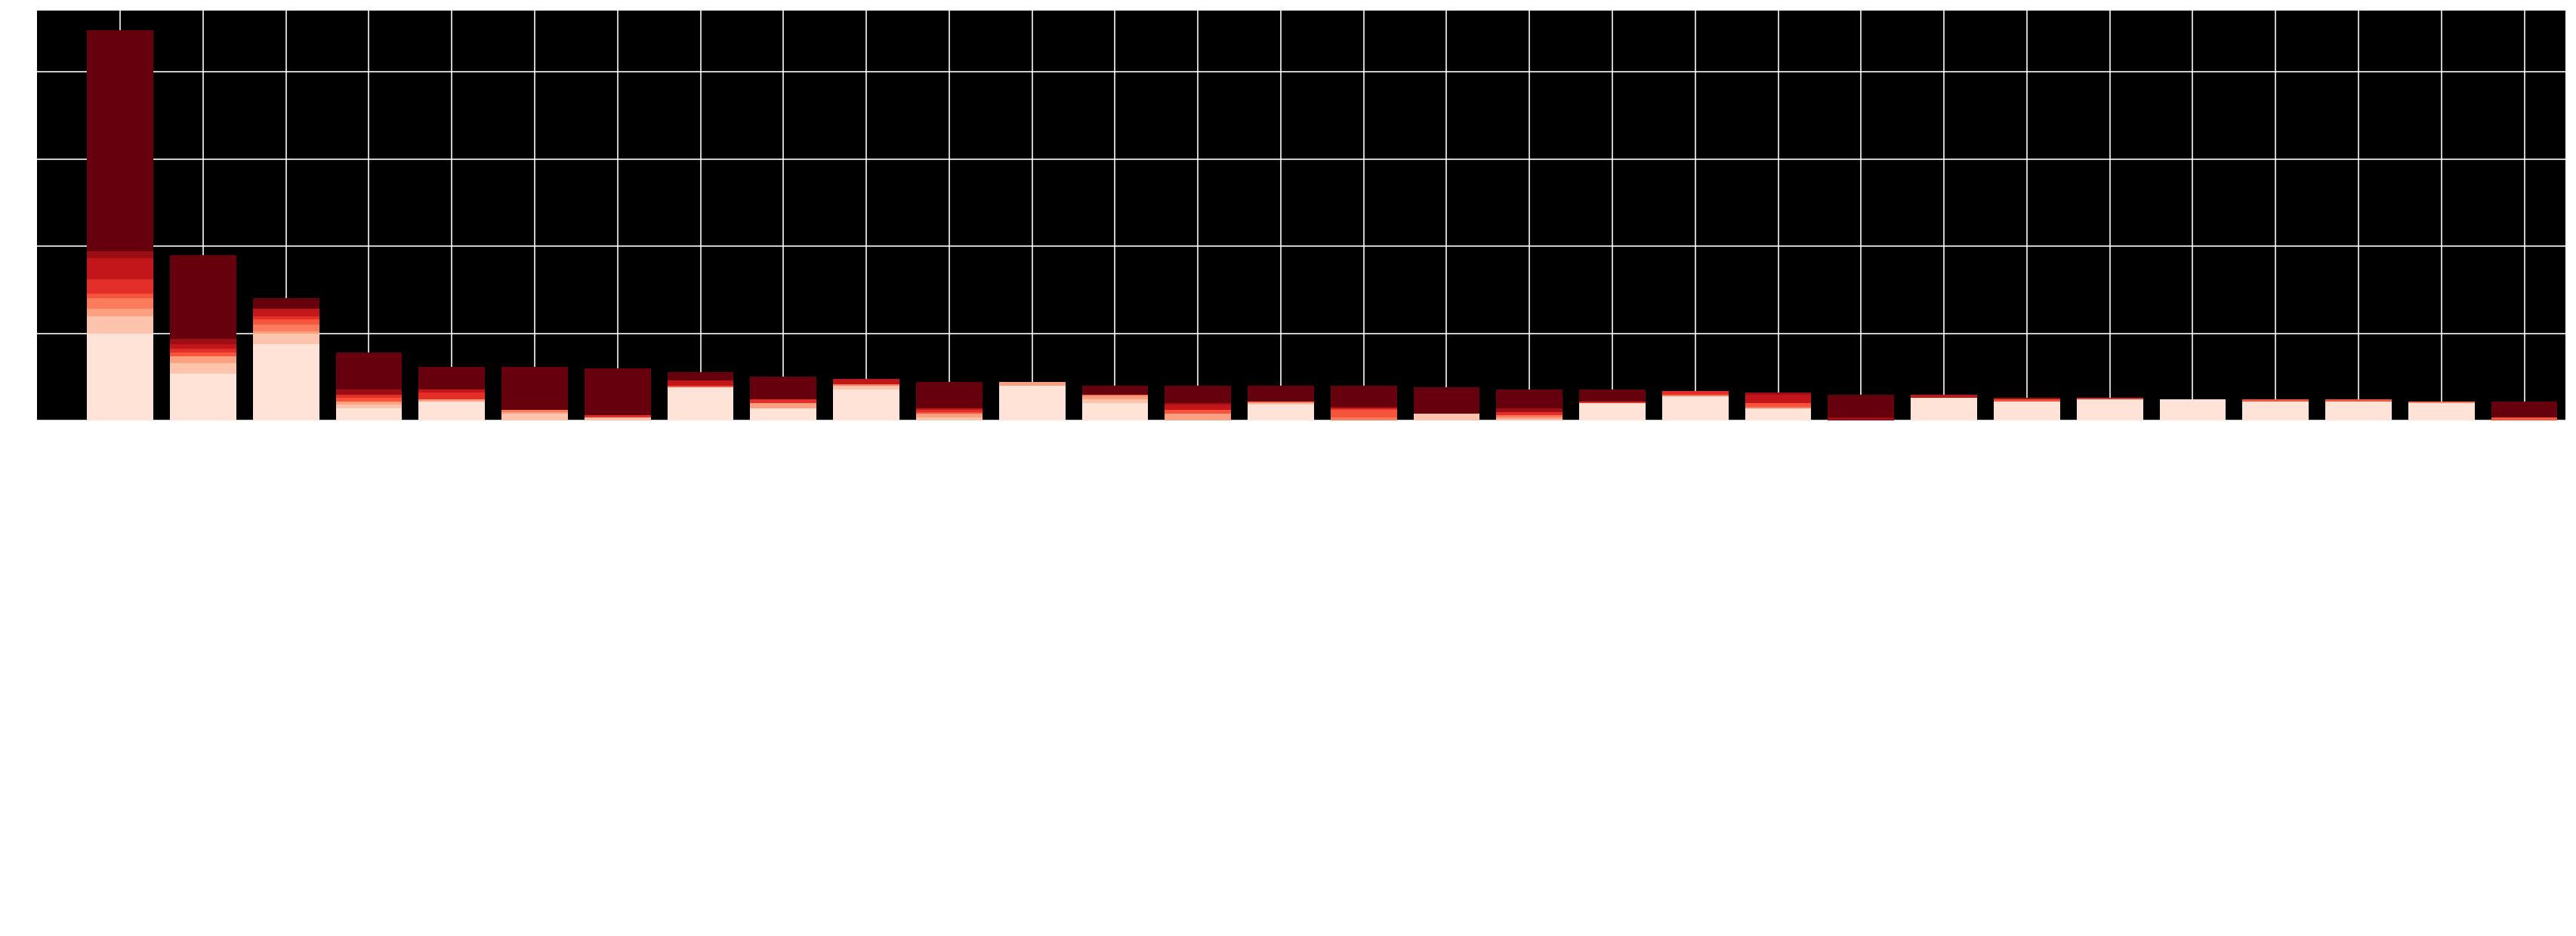

{'Oryx the Mad God 3': 146, 'O3 Oryx Portal': 177, 'Oryx the Mad God 2': 78, 'EH King Bee': 86, 'MV Pattern Helper 1': 33, 'shtrs Bridge Sentinel': 155, 'shtrs Twilight Archmage': 85, 'Belladonna Event Flower Red': 43, 'O3C Counter Attacker North': 96, 'Tundra Yeti': 99, 'O3C Portal Defensive': 32, 'Hallows Ghost God': 147, 'F.E.R.A.L.': 52, 'mc': 108, 'Archbishop Leucoryx': 121, 'MV Kitsune Umi': 157, 'KSW Factory Control Core': 30, 'shtrs The Forgotten King': 68, 'Risen Hell Lava': 116, 'Tundra Dragon': 103, 'Murderous Megamoth': 74, 'shtrs Firebomb': 34, 'Ancient Kaiju': 73, 'Septavius the Ghost God': 81, 'DWD Mr Krabs': 119, 'Oryx Eye Warrior': 109, 'UDL Living Skeleton': 148, 'Carboniferous Flytrap': 149, 'Medusa': 21, 'GC Yellow Worm': 57, 'O3 HMeteor': 66, 'Carboniferous Dragonfly': 139, 'Carboniferous Spider': 8, 'Swarm Spider High': 51, 'MV Pattern Helper 4': 170, 'CR Pink Cnidarian': 75, 'O3C Portal Offensive': 90, 'Deep Sea Kraken': 114, 'GC Boss Child': 169, 'MV Pattern Hel

In [5]:
# Group by Cause_of_death and find the maximum ratio for each cause
df_ratios = pd.get_dummies(df['Max Ratio'])
merged_df = pd.DataFrame(df['Cause of Death']).combine_first(df_ratios)


summary = merged_df.groupby(merged_df.columns.tolist()).size().reset_index(name='count')
new_sum2 = pd.DataFrame(df.groupby('Max Ratio')['Cause of Death'])


counts = []
causes = []
count = []
for i in range(len(new_sum2)):
    counts.append(new_sum2[1][i].value_counts())
    df_new = pd.DataFrame(counts[i])
    causes.append(df_new.index)
    count.append(df_new)
# causes = pd.DataFrame(counts[8]).index
# count = counts[8]

causes = pd.DataFrame(causes); count = pd.DataFrame(count).dropna(axis=1, how= 'any')
merge_again = pd.DataFrame(causes.values.tolist()).combine_first(pd.DataFrame(count.values.tolist())).dropna(axis=1, how= 'any')
# merge_again = merge_again.where(pd.notna(merge_again), np.nan).dropna(axis=1, thresh=1)
merge_again1 = merge_again[0][:]
dicts = []
for i in range(len(merge_again)):
    d_values = dict(zip(merge_again.T[i], count[0][i]['Cause of Death'][:38]))
    dicts.append(d_values)
    
def count_key_occurrences(dicts_list):
    # Gather all unique keys across all dictionaries
    all_keys = set(key for dictionary in dicts_list for key in dictionary.keys())
    
    # Initialize the result dictionary with empty lists for all keys
    result = {key: [] for key in all_keys}

    # Iterate through each dictionary in the list
    for dictionary in dicts_list:
        # Iterate through all unique keys
        for key in all_keys:
            # Append the value if the key exists, otherwise append 0
            result[key].append(dictionary.get(key, 0))
    
    return result

def sort_by_highest_sum(result):
    # Calculate the sum of each list in the dictionary
    sums = {key: sum(values) for key, values in result.items()}
    
    # Sort keys by their sums in descending order
    sorted_keys = sorted(sums.keys(), key=lambda x: sums[x], reverse=True)
    
    # Keep track of the original location of each key
    original_locations = {key: list(result.keys()).index(key) for key in sorted_keys}
    
    # Initialize the final dictionary with order of highest sums
    final_dict = {sum_key: original_locations[sum_key] for sum_key in sorted_keys}
    
    return final_dict


def find_item_by_index(dictionary, index):
    try:
        key = list(dictionary.keys())[index]
        value = dictionary[key]
        return key, value
    except IndexError:
        return None

# Find the item at index 2 (third position)
# result = find_item_by_index(result, final_dict[0])


plt.figure(figsize = (30,5))
plt.style.use('dark_background')
cmap = plt.get_cmap('Reds')
colors = [cmap(i / 9) for i in range(10)]

result = count_key_occurrences(dicts)
final_dict = sort_by_highest_sum(result) 
for j in range(0,30):
    final_key, final_val = find_item_by_index(result, list(final_dict.values())[j])    
    bottom1 = 0
    color_count = 0
    for i in range(len(final_val)):
#         print(i,j)
        if final_val[i] == 0:
            bottom1 += 0
            color_count += 1
#             print('Val is zero', bottom1, color_count)
            pass
        else:
            if i != 0:
                bottom1 += final_val[i-1]
            elif i ==0:
                bottom1 += 0
            color_count+=1
            plt.bar(final_key, final_val[i], bottom = bottom1, label = f'{i}/8', color = colors[color_count])

plt.xticks(rotation = 90, size = 25)
plt.yticks(rotation = 90, size = 15)
plt.xlim(-1, 30 - 0.5)
plt.savefig('ROTMG_stats_5_14', facecolor = 'Black', bbox_inches='tight')
# plt.legend()
plt.show()
print(result, final_dict)

In [6]:
rank_dict1 = rank_array(final_dict.keys())

C:\Users\jdt45\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


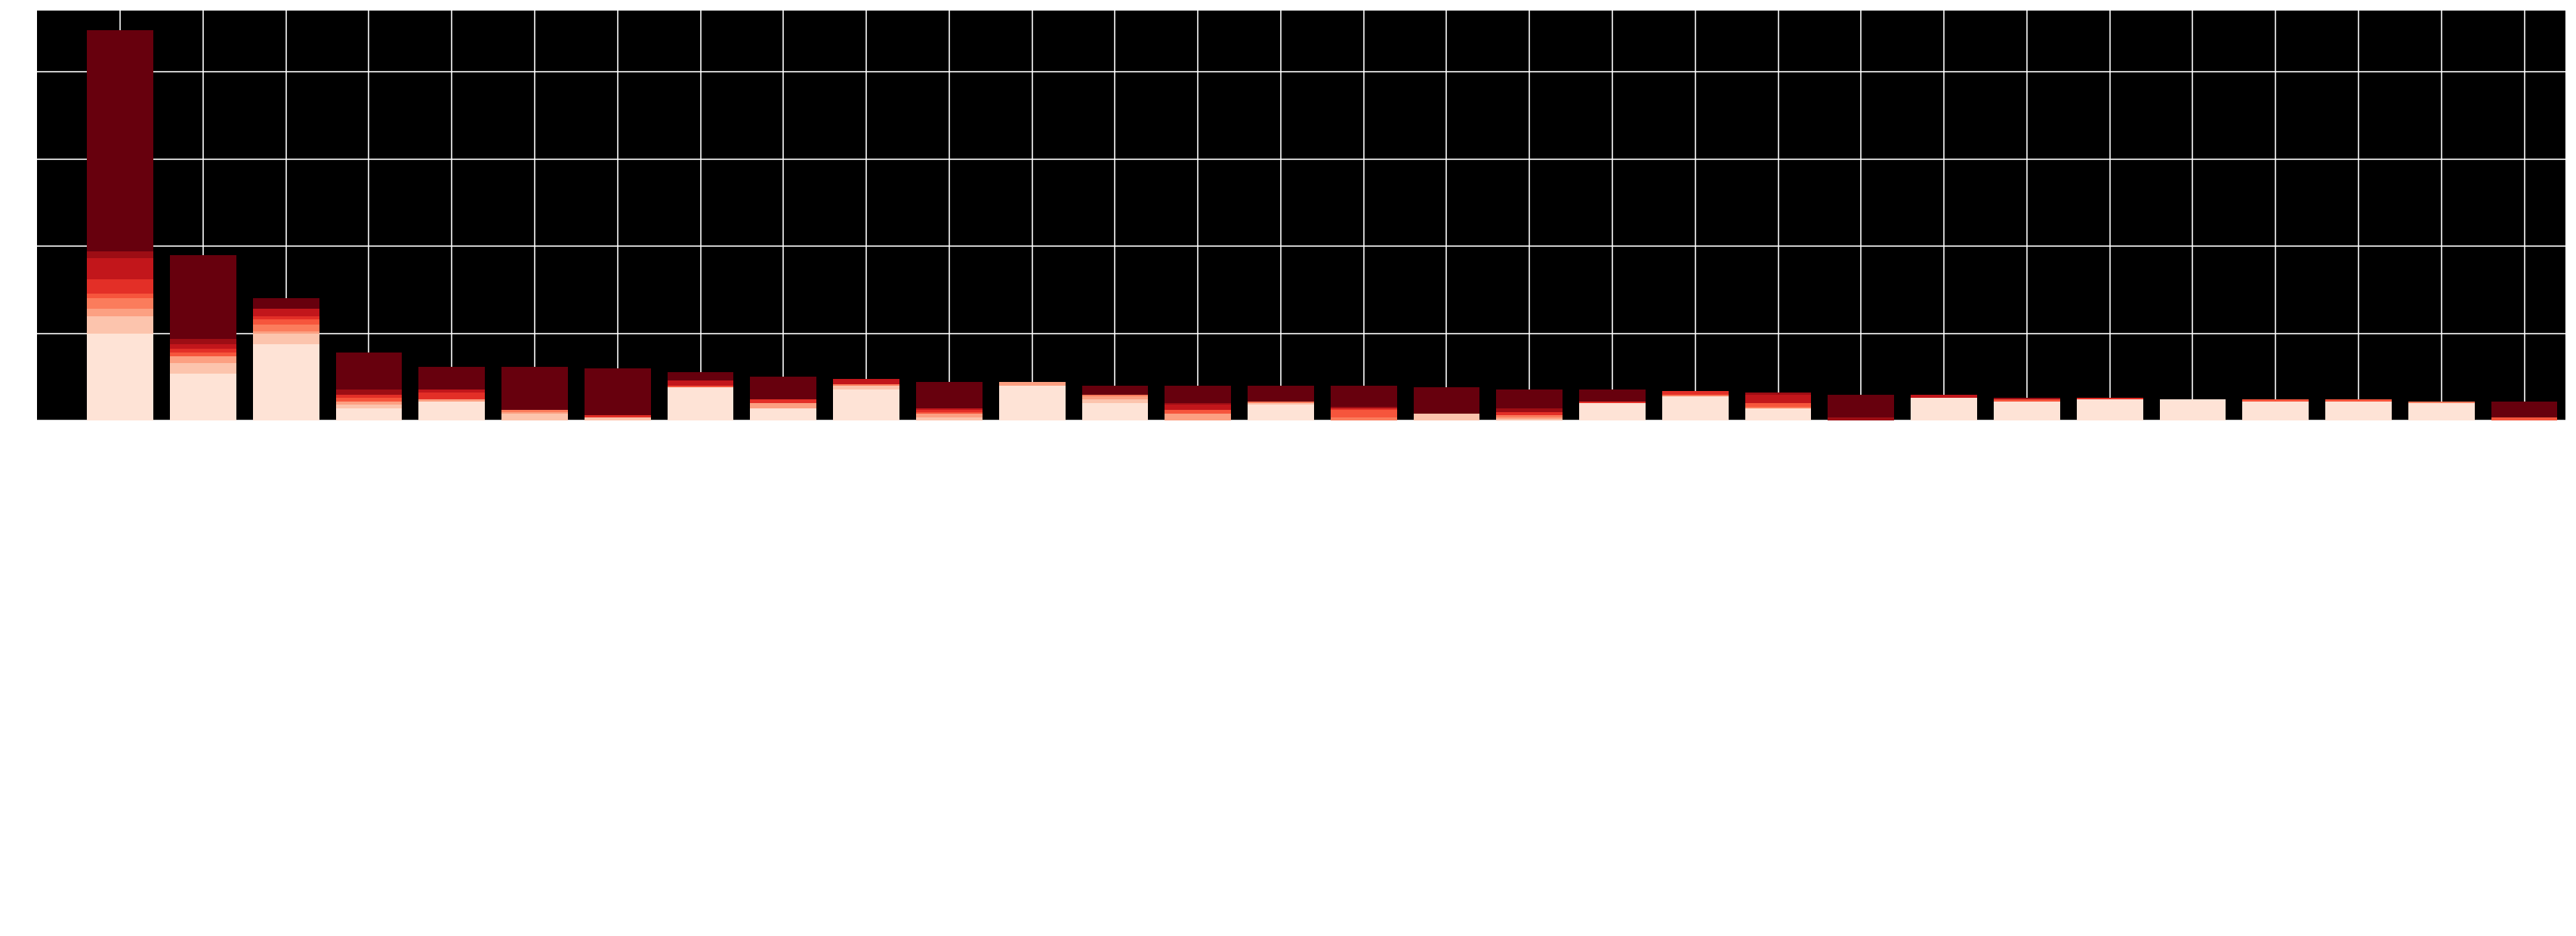

In [89]:
file = f'./May 24/Daily files/{today}.csv'

result2, final_dict2, name_counts2 = load_and_process(file)
plot_stat_CD(result2, final_dict2)

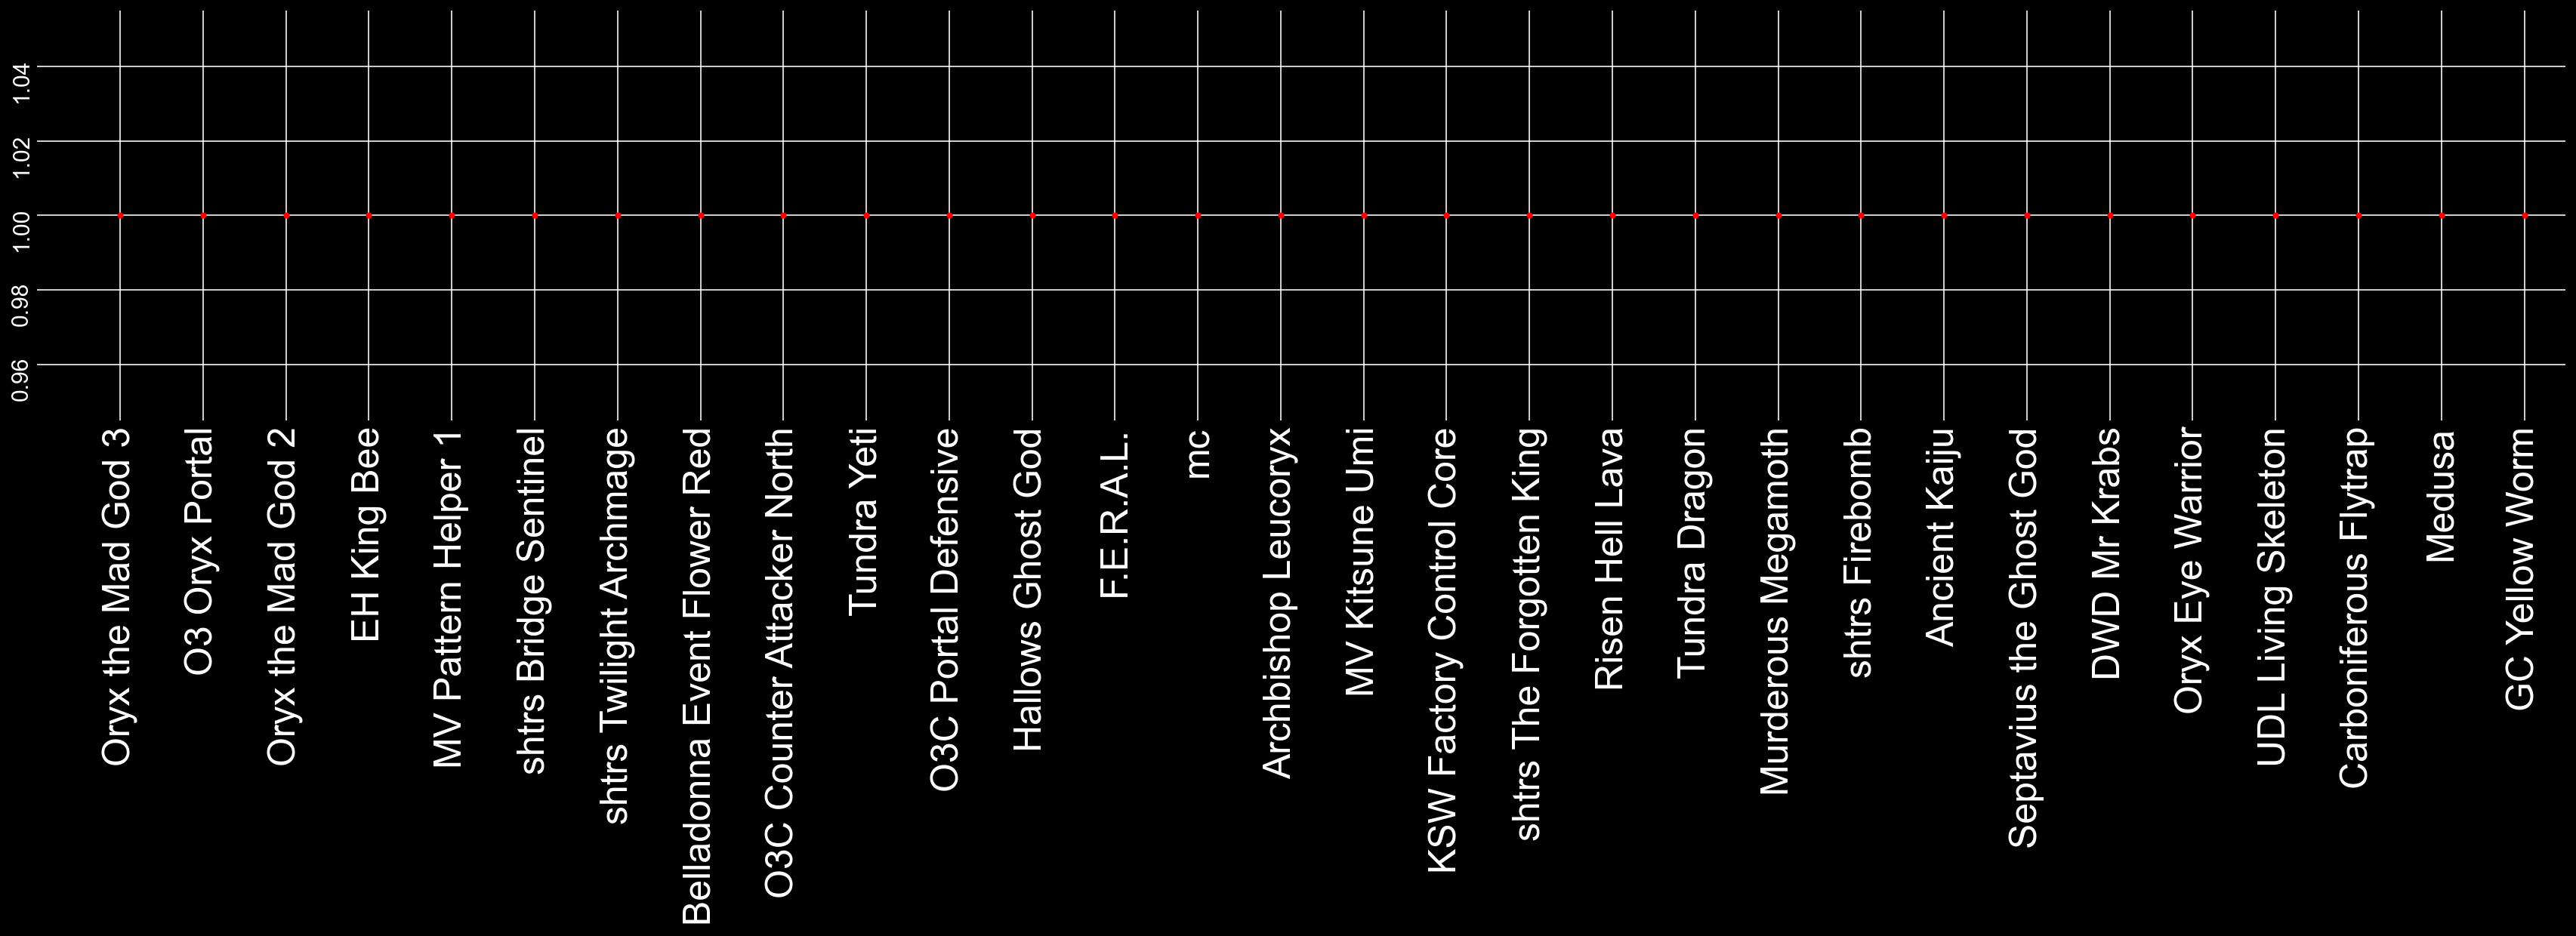

{'Oryx the Mad God 3': 1, 'O3 Oryx Portal': 2, 'Oryx the Mad God 2': 3, 'EH King Bee': 4, 'MV Pattern Helper 1': 5, 'shtrs Bridge Sentinel': 6, 'shtrs Twilight Archmage': 7, 'Belladonna Event Flower Red': 8, 'O3C Counter Attacker North': 9, 'Tundra Yeti': 10, 'O3C Portal Defensive': 11, 'Hallows Ghost God': 12, 'F.E.R.A.L.': 13, 'mc': 14, 'Archbishop Leucoryx': 15, 'MV Kitsune Umi': 16, 'KSW Factory Control Core': 17, 'shtrs The Forgotten King': 18, 'Risen Hell Lava': 19, 'Tundra Dragon': 20, 'Murderous Megamoth': 21, 'shtrs Firebomb': 22, 'Ancient Kaiju': 23, 'Septavius the Ghost God': 24, 'DWD Mr Krabs': 25, 'Oryx Eye Warrior': 26, 'UDL Living Skeleton': 27, 'Carboniferous Flytrap': 28, 'Medusa': 29, 'GC Yellow Worm': 30, 'O3 HMeteor': 31, 'Carboniferous Dragonfly': 32, 'Carboniferous Spider': 33, 'Swarm Spider High': 34, 'MV Pattern Helper 4': 35, 'CR Pink Cnidarian': 36, 'O3C Portal Offensive': 37, 'Deep Sea Kraken': 38, 'GC Boss Child': 39, 'MV Pattern Helper B': 40, 'GC Boss': 41

In [16]:
rank_dict2 = rank_array(final_dict2)
plt.figure(figsize = (30,5))
plt.style.use('dark_background')
cmap = plt.get_cmap('Reds')
plt.plot(rank_dict2.keys(), np.ones(len(rank_dict2.keys())), 'r.')
plt.xticks(rotation = 90, size = 25)
plt.yticks(rotation = 90, size = 15)
plt.xlim(-1, 30 - 0.5)
# plt.savefig('ROTMG_stats_5_15', facecolor = 'Black', bbox_inches='tight')
# plt.legend()
plt.show()
print(rank_dict2)

In [237]:
def flatten(nested_list):
    for item in nested_list:
        if isinstance(item, list):
            yield from flatten(item)
        else:
            yield item
            
def difference_plot(folder_path):
    # List to store the filenames
    filenames = []
    
    # Create a Path object from the folder path
    folder = Path(folder_path)
    
    # Iterate over all files in the folder
    for file in folder.iterdir():
        # Check if it's a file (not a directory)
        if file.is_file():
            filenames.append(file.name)

    print(filenames)
    empty_dict = {}
    for i in range(len(filenames)):
        result, final_dict, name_counts = load_and_process(f'{folder_path}/{filenames[i]}')
        rank_dicty = rank_array(final_dict)
        if i >=1:
            keys = list(rank_dicty.keys())
            values = list(rank_dicty.values())
            for j in range(10):
                key = keys[j]
                value = values[j]
                if key in empty_dict:
                    # Ensure that the value associated with the key is a list
                    if not isinstance(empty_dict[key], list):
                        empty_dict[key] = [empty_dict[key]]  # Convert to list if not already

                    # Append the value to the list
                    empty_dict[key].append(value)
                else:
                    empty_dict[key] = [value]

            for j in range(10):
                value_og = empty_dict[keys[j]]
                if len(list(empty_dict[keys[j]])) != i+1 :
                    empty_dict[keys[j]].append(11)
                if i != 1 and len(value_og) <= i:
                    
#                     print(value_og)
                    for k in range(len(value_og)):
                        if k <= i+1 and k != len(value_og)-1:
                            empty_dict[keys[j]] = ([11]*(len(keys[j])-i+1))
                                                   
                        else:
                            empty_dict[keys[j]].append(value_og)

        else:
            empty_dict = rank_dicty
            keys = list(rank_dicty.keys())[:10]
            values = [rank_dicty[key] for key in keys]
            empty_dict = dict(zip(keys, values))
        
        
    keys = list(empty_dict.keys())
    for i in range(len(keys)):
        if len(list(empty_dict[keys[i]])) <= 4:
            empty_dict[keys[i]].append(11)
            
#     print(empty_dict)
    return(empty_dict)
    
rank_dict = difference_plot('./May 24/Daily files')
new_dict = dict(zip(list(rank_dict.keys())[:10], list(rank_dict.values())[:10]))
print((list(new_dict.keys())))
print(list(new_dict.values()))

['2024-05-14.csv', '2024-05-15.csv', '2024-05-16.csv', '2024-05-17.csv', '2024-05-18.csv']
['Oryx the Mad God 3', 'O3 Oryx Portal', 'Oryx the Mad God 2', 'mc', 'Belladonna Event Flower Red', 'MV Pattern Helper 1', 'O3C Counter Attacker North', 'shtrs Bridge Sentinel', 'EH King Bee', 'shtrs Twilight Archmage']
[[1, 1, 1, 1, 1], [2, 2, 2, 3, 3], [3, 3, 4, 4, 4], [4, 6, 11, 8, 11], [5, 8, 7, 10, 11], [6, 5, 6, 11, 5], [7, 9, 9, 7, 11], [8, 6, 10, 11], [9, 4, 3, 2, 2], [10, 7, 8, 7, 11]]


In [230]:
def set_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "text.color": text_color,
        "font.family": font_family,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)
    
font_family = "PT Mono"
background_color = "#FAF0F1"
text_color = "#080520"
grid_color = "#E4C9C9"

set_style(font_family, background_color, grid_color, text_color)

def format_ticks(ax, years, df,padx=0.25, pady=0.5, y_label_size=20, x_label_size=24):
    print(years, df)
    ax.set(xlim=(-padx, len(years) -1 + padx), ylim=(-len(df) - pady, - pady))

    xticks = [i for i in range(len(years))]
    ax.set_xticks(ticks=xticks)
    ax.set_xticklabels(['5-14','5-15','5-16','5-17','5-18'])

    yticks = [-i for i in range(1, len(df) + 1)]
    ax.set_yticks(ticks=yticks)
    ax.set_yticklabels(df)
    ax.tick_params("y",labelsize=y_label_size, pad=16)
    ax.tick_params("x", labeltop=True, labelsize=x_label_size, pad=8)

In [248]:
def add_line(ax, row, columns):
    x = [columns[i] for i in range(len(columns))]
#     print(x)
#     for i,rc in enumerate(columns):
#         print(i, rc)
    y = [row]*5
#     print(y)
    ax.add_artist(
        Line2D(x, y, linewidth=3, color=text_color)
    )

[1, 1, 1, 1, 1] ['Oryx the Mad God 3', 'O3 Oryx Portal', 'Oryx the Mad God 2', 'mc', 'Belladonna Event Flower Red', 'MV Pattern Helper 1', 'O3C Counter Attacker North', 'shtrs Bridge Sentinel', 'EH King Bee', 'shtrs Twilight Archmage']
[[1, 1, 1, 1, 1], [2, 2, 2, 3, 3], [3, 3, 4, 4, 4], [4, 6, 11, 8, 11], [5, 8, 7, 10, 11], [6, 5, 6, 11, 5], [7, 9, 9, 7, 11], [8, 6, 10, 11, 11], [9, 4, 3, 2, 2], [10, 7, 8, 7, 11]]
0 Oryx the Mad God 3 [1, 1, 1, 1, 1]
1 O3 Oryx Portal [2, 2, 2, 3, 3]
2 Oryx the Mad God 2 [3, 3, 4, 4, 4]
3 mc [4, 6, 11, 8, 11]
4 Belladonna Event Flower Red [5, 8, 7, 10, 11]
5 MV Pattern Helper 1 [6, 5, 6, 11, 5]
6 O3C Counter Attacker North [7, 9, 9, 7, 11]
7 shtrs Bridge Sentinel [8, 6, 10, 11, 11]
8 EH King Bee [9, 4, 3, 2, 2]
9 shtrs Twilight Archmage [10, 7, 8, 7, 11]


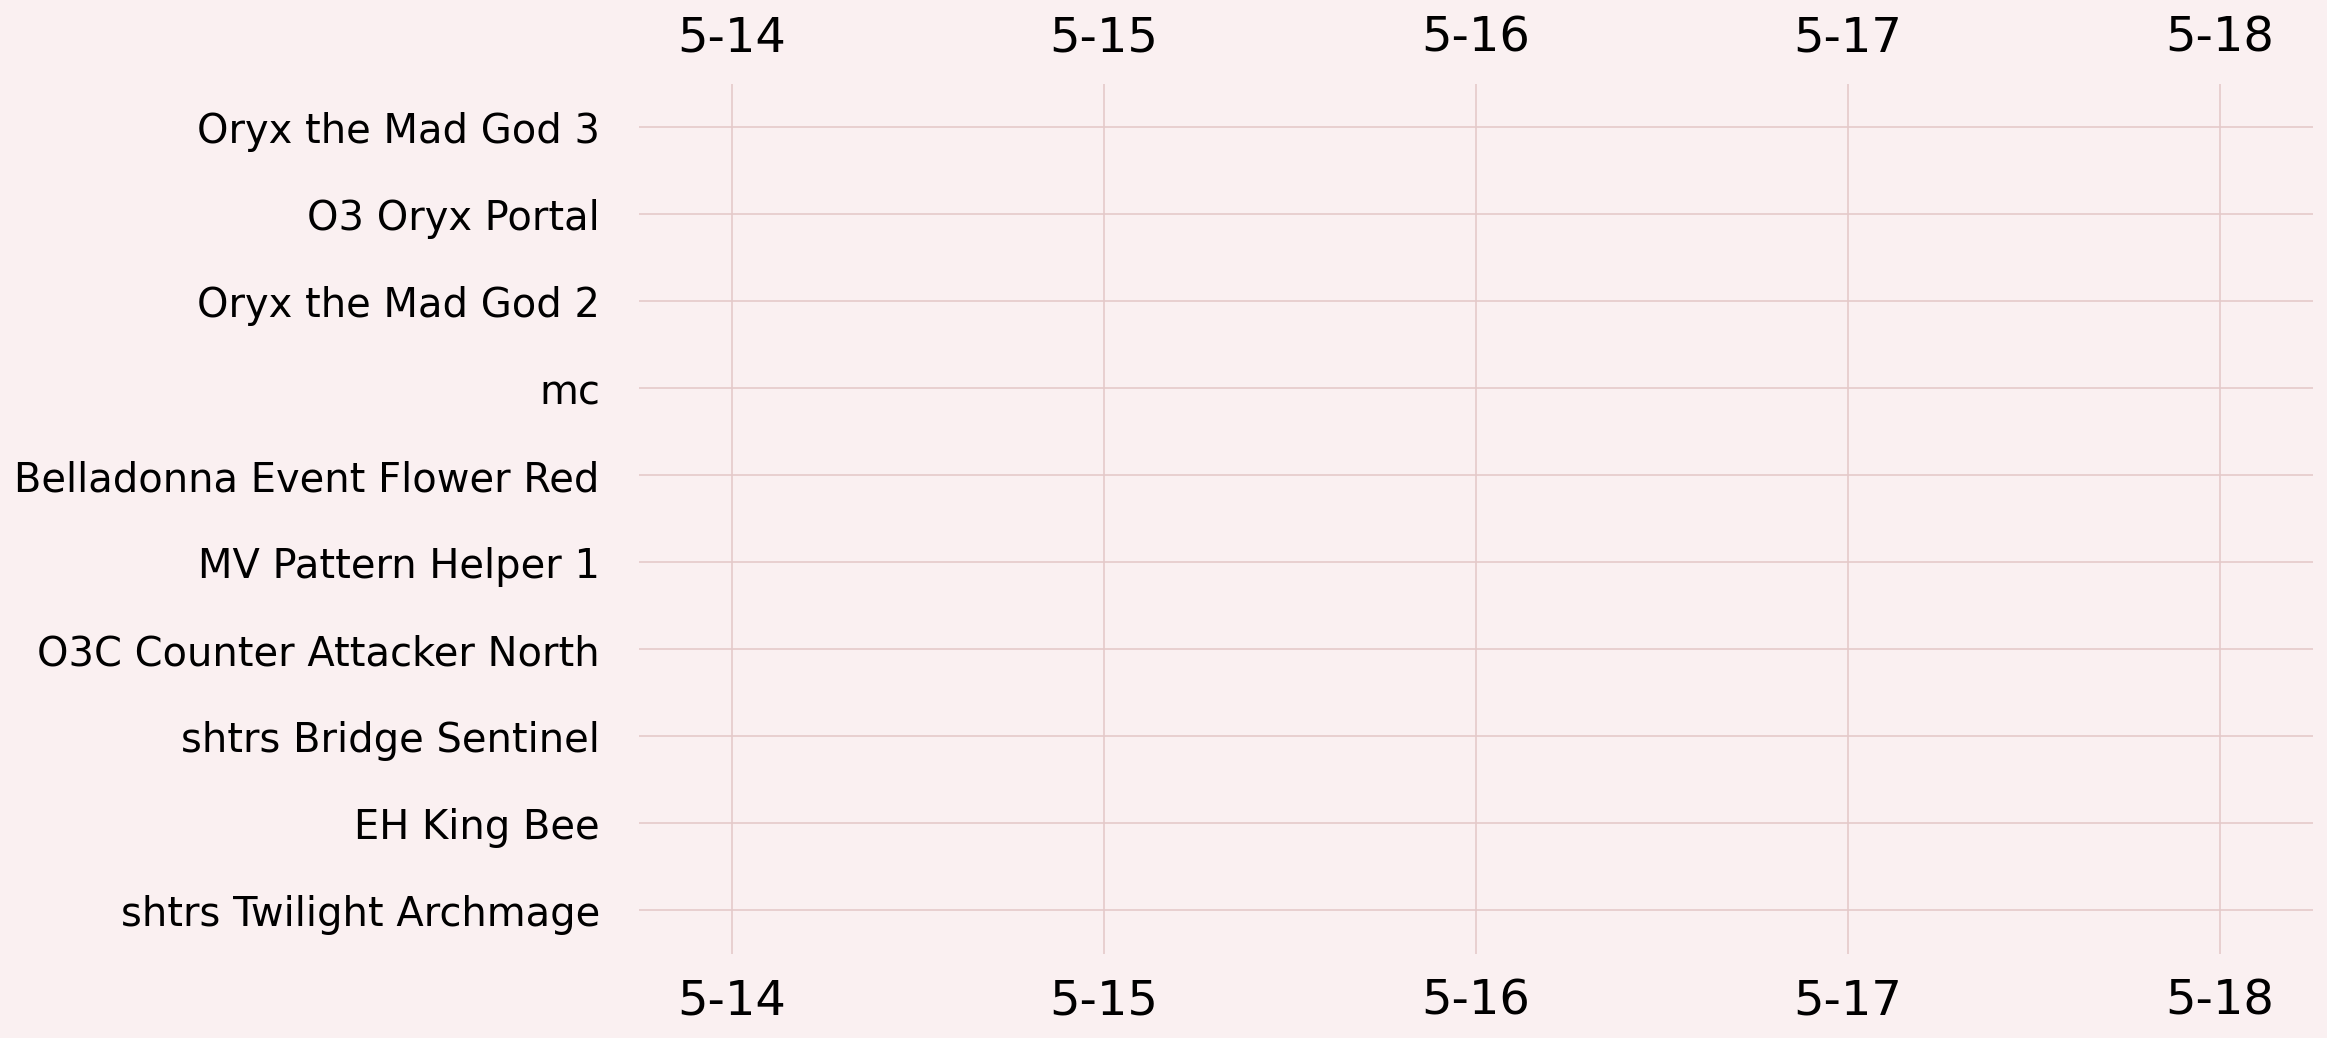

In [249]:
# Create chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1.6*(5)))
format_ticks(ax, list(new_dict.values())[0], list(new_dict.keys()))

# Draw lines
columns = [[1, 1, 1, 1, 1], [2, 2, 2, 3, 3], [3, 3, 4, 4, 4], [4, 6, 11, 8, 11],
           [5, 8, 7, 10, 11], [6, 5, 6, 11, 5], [7, 9, 9, 7, 11], [8, 6, 10, 11,11],
           [9, 4, 3, 2, 2], [10, 7, 8, 7, 11]]
rows = list(new_dict.keys())
print(columns)
for j,row in enumerate(rows):
    print(j, row, columns[j])
    add_line(ax, j, columns[j])

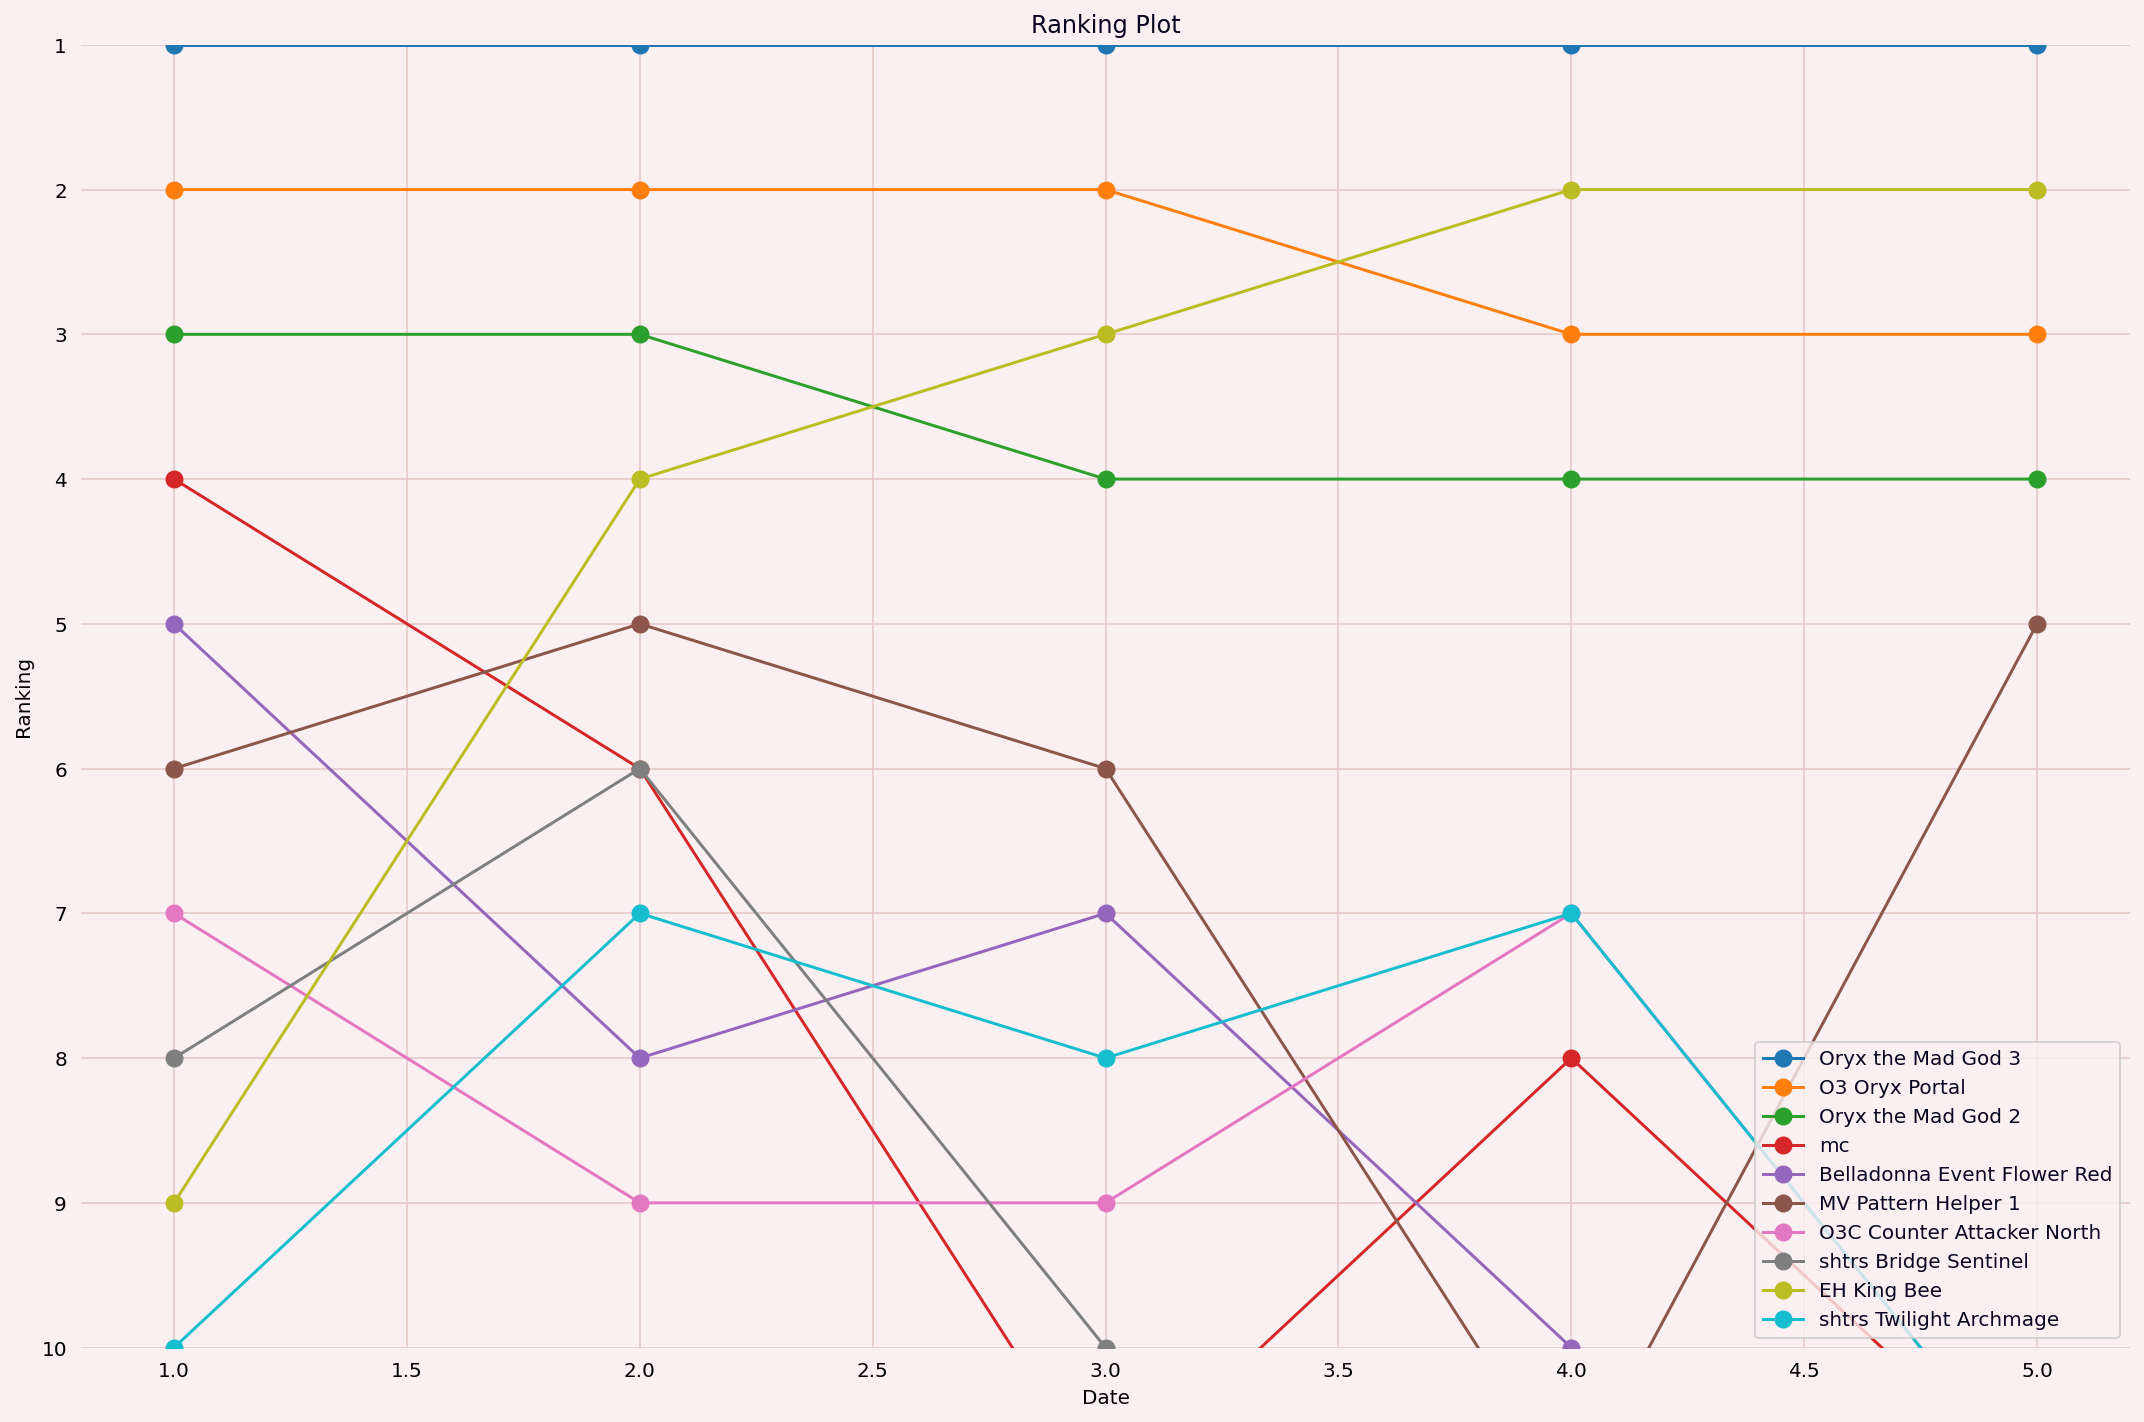

In [276]:
# Data
data = [
    ("Oryx the Mad God 3", [1, 1, 1, 1, 1]),
    ("O3 Oryx Portal", [2, 2, 2, 3, 3]),
    ("Oryx the Mad God 2", [3, 3, 4, 4, 4]),
    ("mc", [4, 6, 11, 8, 11]),
    ("Belladonna Event Flower Red", [5, 8, 7, 10, 11]),
    ("MV Pattern Helper 1", [6, 5, 6, 11, 5]),
    ("O3C Counter Attacker North", [7, 9, 9, 7, 11]),
    ("shtrs Bridge Sentinel", [8, 6, 10, 11, 11]),
    ("EH King Bee", [9, 4, 3, 2, 2]),
    ("shtrs Twilight Archmage", [10, 7, 8, 7, 11])
]

# Extract names and rankings
names = [entry[0] for entry in data]
rankings = [entry[1] for entry in data]

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

for i, (name, ranking) in enumerate(data):
    ax.plot(range(1, len(ranking) + 1), ranking, marker = '.',markersize = 16, label=name)

# Set labels and title
ax.set_ylim(1,10)
ax.set_xlabel('Date')
ax.set_ylabel('Ranking')
# ax.set_xticklabels(['5-14','5-15', '5-16','5-17', '5-18'])
ax.set_title('Ranking Plot')
ax.invert_yaxis()  # Invert y-axis to have higher rankings at the top
ax.legend(loc='lower right')

plt.grid(True)
plt.tight_layout()
plt.savefig('./draft_ranking')
plt.show()